In [ ]:
"""
This notebook will be exploring the distribution of vehicles traveling the BQE pre/post Weigh In Motion Enforcement.
We seek to determine if there was a statistically significant change in the volume of traffic/ type of traffic traversing the BQE.
"""

In [1]:
import pandas as pd

Seperating Pre-Enforcement and Post-Enforcement Data

In [ ]:
#Queens Bound , 2019 - 2023
df = pd.read_csv("./Data/Daily_Vehicle_Count/QB_daily_vehicle_count_19_23.csv")

In [79]:
#Applying function to each row to create new column from year, month, day with format YYYYMMDD for the purpose of ordering data
def create_year_month_day(row):
    return f"{row['year']}{row['month']:02d}{row['day']:02d}"

df['year_month_day'] = df.apply(create_year_month_day, axis=1)

df

,direction,year,month,day,class,class_count,year_month_day
0,QB,23,1,27,13,34,230127
1,QB,23,8,24,14,119,230824
2,QB,23,3,20,6,763,230320
3,QB,23,12,11,5,3107,231211
4,QB,23,10,25,4,227,231025
...,...,...,...,...,...,...,...
18004,QB,19,11,14,12,1,191114
18005,QB,19,12,17,12,3,191217
18006,QB,19,10,19,12,1,191019
18007,QB,19,12,26,12,2,191226


In [80]:
df["year_month_day"] = df["year_month_day"].astype(int)
df = df.sort_values("year_month_day", ascending=True)
# Queens Bound WIM enforcement began Novemeber 13, 2023

df = df.reset_index(drop=True)

In [81]:
pre_enforcement_df1 = df[df["year_month_day"] < 231113]
post_enforcement_df1 = df[df["year_month_day"] >= 231113]

In [82]:
pre_enforcement_df1 #QB Daily Traffic Count Pre-enforcement 2019 - 2023

,direction,year,month,day,class,class_count,year_month_day
0,QB,19,10,16,5,1969,191016
1,QB,19,10,16,12,2,191016
2,QB,19,10,16,13,7,191016
3,QB,19,10,16,9,1866,191016
4,QB,19,10,16,3,7056,191016
...,...,...,...,...,...,...,...
17353,QB,23,11,12,3,4261,231112
17354,QB,23,11,12,9,487,231112
17355,QB,23,11,12,6,90,231112
17356,QB,23,11,12,5,1032,231112


In [83]:
post_enforcement_df1 #QB Daily Traffic Count Post-enforcement 2019 - 2023

,direction,year,month,day,class,class_count,year_month_day
17358,QB,23,11,13,4,208,231113
17359,QB,23,11,13,11,20,231113
17360,QB,23,11,13,9,1554,231113
17361,QB,23,11,13,2,33659,231113
17362,QB,23,11,13,6,713,231113
...,...,...,...,...,...,...,...
18004,QB,23,12,31,4,131,231231
18005,QB,23,12,31,3,3514,231231
18006,QB,23,12,31,5,866,231231
18007,QB,23,12,31,8,49,231231


In [ ]:
df2 = pd.read_csv("./Data/Daily_Vehicle_Count/QB_daily_vehicle_count_24_25.csv")

df2

,direction,year,month,day,class,class_count
0,QB,24,6,11,2,30297
1,QB,24,2,15,3,6536
2,QB,24,3,17,3,3864
3,QB,24,2,26,6,644
4,QB,24,4,25,4,366
...,...,...,...,...,...,...
5772,QB,25,1,16,13,1
5773,QB,25,2,2,14,1
5774,QB,25,1,30,14,1
5775,QB,25,3,26,14,2


In [84]:
df2['year_month_day'] = df2.apply(create_year_month_day, axis=1)

df2

,direction,year,month,day,class,class_count,year_month_day
1846,QB,24,1,1,1,38,240101
4823,QB,24,1,1,14,7,240101
849,QB,24,1,1,7,8,240101
194,QB,24,1,1,5,797,240101
555,QB,24,1,1,12,9,240101
...,...,...,...,...,...,...,...
5076,QB,25,3,31,9,711,250331
5018,QB,25,3,31,8,87,250331
5069,QB,25,3,31,11,9,250331
4889,QB,25,3,31,3,2016,250331


In [88]:
df2["year_month_day"] = df2["year_month_day"].astype(int)
df2 = df2.sort_values("year_month_day", ascending=True)
df2 = df2.reset_index(drop=True)

In [89]:
df2

,direction,year,month,day,class,class_count,year_month_day
0,QB,24,1,1,1,38,240101
1,QB,24,1,1,14,7,240101
2,QB,24,1,1,7,8,240101
3,QB,24,1,1,5,797,240101
4,QB,24,1,1,12,9,240101
...,...,...,...,...,...,...,...
5772,QB,25,3,31,9,711,250331
5773,QB,25,3,31,8,87,250331
5774,QB,25,3,31,11,9,250331
5775,QB,25,3,31,3,2016,250331


In [ ]:
post_enforcement_df2 = pd.concat([post_enforcement_df1,df2], axis=0) 
#Joining Historical and Current Data to form comprehensive post-enforcement df for daily vehicle count QB.

post_enforcement_df2 = post_enforcement_df2.reset_index(drop=True)

post_enforcement_df2

,direction,year,month,day,class,class_count,year_month_day
0,QB,23,11,13,4,208,231113
1,QB,23,11,13,11,20,231113
2,QB,23,11,13,9,1554,231113
3,QB,23,11,13,2,33659,231113
4,QB,23,11,13,6,713,231113
...,...,...,...,...,...,...,...
6423,QB,25,3,31,9,711,250331
6424,QB,25,3,31,8,87,250331
6425,QB,25,3,31,11,9,250331
6426,QB,25,3,31,3,2016,250331


In [ ]:
pre_enforcement_df1.to_csv("QB_pre_enforcement.csv", index=False)

post_enforcement_df2.to_csv("QB_post_enforcement.csv", index=False         )

Pre-enforcement SI bound Data

In [93]:
df3 = pd.read_csv("./Data/Daily_Vehicle_Count/SIB_daily_vehicle_count_19_23.csv")

df3

,direction,year,month,day,class,class_count
0,SIB,20,5,10,2,34801
1,SIB,20,1,12,2,57089
2,SIB,20,4,26,2,24158
3,SIB,20,7,29,3,8089
4,SIB,20,7,16,2,40987
...,...,...,...,...,...,...
5685,SIB,19,11,3,7,2
5686,SIB,19,11,24,13,1
5687,SIB,19,11,30,12,1
5688,SIB,19,12,29,12,1


In [94]:
df3['year_month_day'] = df3.apply(create_year_month_day, axis=1)

df3

,direction,year,month,day,class,class_count,year_month_day
0,SIB,20,5,10,2,34801,200510
1,SIB,20,1,12,2,57089,200112
2,SIB,20,4,26,2,24158,200426
3,SIB,20,7,29,3,8089,200729
4,SIB,20,7,16,2,40987,200716
...,...,...,...,...,...,...,...
5685,SIB,19,11,3,7,2,191103
5686,SIB,19,11,24,13,1,191124
5687,SIB,19,11,30,12,1,191130
5688,SIB,19,12,29,12,1,191229


In [95]:
df3["year_month_day"] = df3["year_month_day"].astype(int)
df3 = df3.sort_values("year_month_day", ascending=True)
df3 = df3.reset_index(drop=True)

df3

,direction,year,month,day,class,class_count,year_month_day
0,SIB,19,10,11,12,269,191011
1,SIB,19,10,11,14,7943,191011
2,SIB,19,10,11,5,1719,191011
3,SIB,19,10,11,6,798,191011
4,SIB,19,10,11,1,2755,191011
...,...,...,...,...,...,...,...
5685,SIB,20,12,31,8,72,201231
5686,SIB,20,12,31,7,13,201231
5687,SIB,20,12,31,11,2,201231
5688,SIB,20,12,31,3,3394,201231


In [96]:
df3.to_csv("./Data/Pre_Post_Enforcement/SIB_pre_enforcement.csv", index=False)

Comparing Pre-enforcement Vehicle Count Distribution vs. Post-enforcement

In [9]:
import pandas as pd
#Queens Bound Traffic

pre_df = pd.read_csv("./Data/Pre_Post_Enforcement/QB_pre_enforcement.csv")
post_df = pd.read_csv("./Data/Pre_Post_Enforcement/QB_post_enforcement.csv")

In [8]:
pre_df2 = pre_df[pre_df["year_month_day"] >= 221112] #pre_df2 filters for 1 year period before enforcement

pre_df2

,direction,year,month,day,class,class_count,year_month_day
13080,QB,22,12,19,10,29,221219
13081,QB,22,12,19,13,21,221219
13082,QB,22,12,19,2,32715,221219
13083,QB,22,12,19,1,31,221219
13084,QB,22,12,19,6,822,221219
...,...,...,...,...,...,...,...
17353,QB,23,11,12,3,4261,231112
17354,QB,23,11,12,9,487,231112
17355,QB,23,11,12,6,90,231112
17356,QB,23,11,12,5,1032,231112


In [ ]:
post_df2 = post_df[(post_df["year_month_day"] <= 241112) & (post_df["year_month_day"] >= 231219)] #post_df2 filters for 1 year traffic

post_df2 #Same period as pre-enforcement 1 year later

,direction,year,month,day,class,class_count,year_month_day
484,QB,23,12,19,14,25,231219
485,QB,23,12,19,7,57,231219
486,QB,23,12,19,9,1563,231219
487,QB,23,12,19,4,185,231219
488,QB,23,12,19,3,6462,231219
...,...,...,...,...,...,...,...
4714,QB,24,11,12,6,427,241112
4715,QB,24,11,12,11,30,241112
4716,QB,24,11,12,10,13,241112
4717,QB,24,11,12,12,22,241112


In [ ]:
#vehicle classes observed pre/post-enforcement
pre_classes = pre_df2["class"].unique().tolist()
post_classes = post_df2["class"].unique().tolist()

In [19]:
pre_post_classes = [] # vehicle classes observed pre and post enforcement

temp_list = pre_classes+post_classes
for item in temp_list:
    if item not in pre_post_classes:
        pre_post_classes.append(item)

pre_post_classes 

[10, 13, 2, 1, 6, 11, 12, 7, 5, 3, 4, 8, 14, 9]

In [36]:
pre2_post2_df = pd.concat([pre_df2,post_df2], axis=0)

pre2_post2_df

,direction,year,month,day,class,class_count,year_month_day
13080,QB,22,12,19,10,29,221219
13081,QB,22,12,19,13,21,221219
13082,QB,22,12,19,2,32715,221219
13083,QB,22,12,19,1,31,221219
13084,QB,22,12,19,6,822,221219
...,...,...,...,...,...,...,...
4714,QB,24,11,12,6,427,241112
4715,QB,24,11,12,11,30,241112
4716,QB,24,11,12,10,13,241112
4717,QB,24,11,12,12,22,241112


In [ ]:
#Creating a new date column ignoring year to compare veh. count pre/post the same period in the year
def create_month_day(row):
    return int(str(row["year_month_day"])[2:])

pre2_post2_df['month_day'] = pre2_post2_df.apply(create_month_day, axis=1)

pre2_post2_df

,direction,year,month,day,class,class_count,year_month_day,month_day
13080,QB,22,12,19,10,29,221219,1219
13081,QB,22,12,19,13,21,221219,1219
13082,QB,22,12,19,2,32715,221219,1219
13083,QB,22,12,19,1,31,221219,1219
13084,QB,22,12,19,6,822,221219,1219
...,...,...,...,...,...,...,...,...
4714,QB,24,11,12,6,427,241112,1112
4715,QB,24,11,12,11,30,241112,1112
4716,QB,24,11,12,10,13,241112,1112
4717,QB,24,11,12,12,22,241112,1112


In [ ]:
#Creating categorical var. to identify pre-post enforcement date when plotting
def create_pre_post(row):
    if row["year_month_day"] > 231113:
        return 1 #post enforcemenet
    else: 
        return 0 #pre enforcement
    
pre2_post2_df['pre_post_bool'] = pre2_post2_df.apply(create_pre_post, axis=1)

pre2_post2_df

,direction,year,month,day,class,class_count,year_month_day,month_day,pre_post_bool
13080,QB,22,12,19,10,29,221219,1219,0
13081,QB,22,12,19,13,21,221219,1219,0
13082,QB,22,12,19,2,32715,221219,1219,0
13083,QB,22,12,19,1,31,221219,1219,0
13084,QB,22,12,19,6,822,221219,1219,0
...,...,...,...,...,...,...,...,...,...
4714,QB,24,11,12,6,427,241112,1112,1
4715,QB,24,11,12,11,30,241112,1112,1
4716,QB,24,11,12,10,13,241112,1112,1
4717,QB,24,11,12,12,22,241112,1112,1


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

Vehicle Class 1

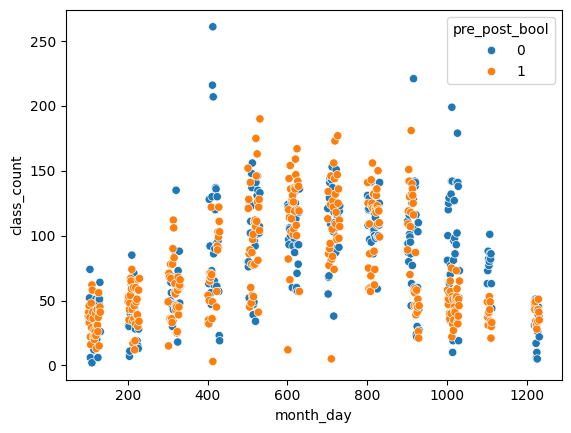

In [95]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 1]

sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")
plt.show()

# 0 pre-enf. 1 post-enf.

In [96]:
#Mean Variance of Daily Vehicle Count Veh. Class 1 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    319.000000
mean      82.865204
std       42.800738
min        2.000000
25%       47.500000
50%       86.000000
75%      116.000000
max      261.000000
Name: class_count, dtype: float64

In [97]:
#Mean Variance of Daily Vehicle Count Veh. Class 1 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    322.000000
mean      75.959627
std       41.572534
min        3.000000
25%       42.000000
50%       62.500000
75%      112.000000
max      190.000000
Name: class_count, dtype: float64

Vehicle Class 2

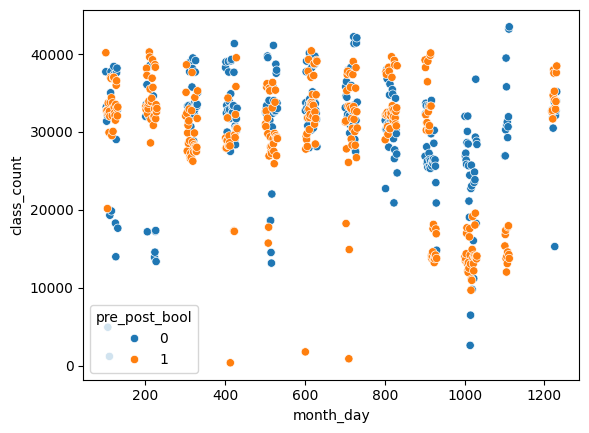

In [98]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 2]

sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")
plt.show()

# 0 pre-enf. 1 post-enf.

In [99]:
#Mean Variance of Daily Vehicle Count Veh. Class 2 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count      319.000000
mean     30765.498433
std       6751.857114
min       1202.000000
25%      28592.500000
50%      32260.000000
75%      33816.500000
max      43494.000000
Name: class_count, dtype: float64

In [100]:
#Mean Variance of Daily Vehicle Count Veh. Class 2 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count      322.000000
mean     28870.152174
std       8305.349592
min        385.000000
25%      27503.750000
50%      31616.500000
75%      33740.250000
max      40408.000000
Name: class_count, dtype: float64

Vehicle Class 3

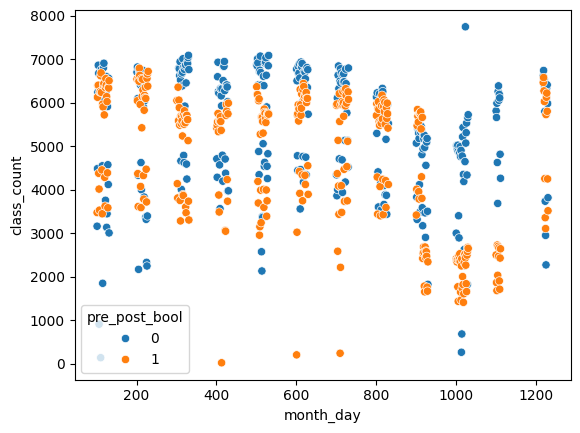

In [101]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 3]

sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")
plt.show()

# 0 pre-enf. 1 post-enf.

In [102]:
#Mean Variance of Daily Vehicle Count Veh. Class 3 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count     319.000000
mean     5358.931034
std      1407.419956
min       137.000000
25%      4451.000000
50%      5797.000000
75%      6530.000000
max      7743.000000
Name: class_count, dtype: float64

In [103]:
#Mean Variance of Daily Vehicle Count Veh. Class 3 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count     322.000000
mean     4659.965839
std      1579.807842
min        20.000000
25%      3474.000000
50%      5492.000000
75%      5964.750000
max      6790.000000
Name: class_count, dtype: float64

Vehicle Class 4

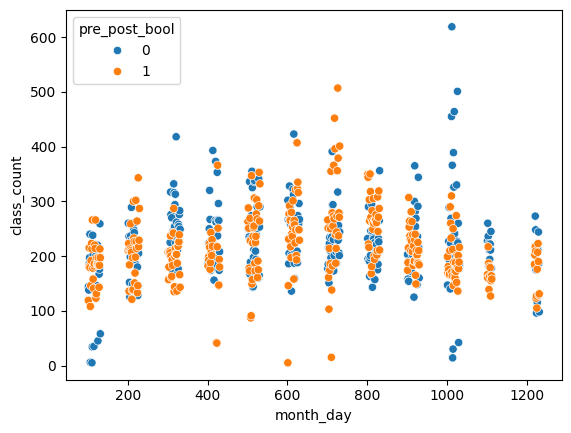

In [104]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 4]

sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")
plt.show()

# 0 pre-enf. 1 post-enf.

In [105]:
#Mean Variance of Daily Vehicle Count Veh. Class 4 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    319.000000
mean     226.611285
std       72.743795
min        5.000000
25%      186.000000
50%      223.000000
75%      260.000000
max      619.000000
Name: class_count, dtype: float64

In [106]:
#Mean Variance of Daily Vehicle Count Veh. Class 4 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    321.000000
mean     217.043614
std       64.910212
min        5.000000
25%      179.000000
50%      210.000000
75%      255.000000
max      507.000000
Name: class_count, dtype: float64

Vehicle Class 5

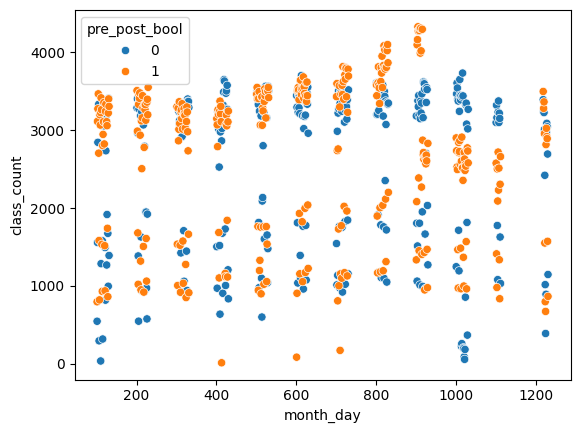

In [107]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 5]

sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")
plt.show()

# 0 pre-enf. 1 post-enf.

In [108]:
#Mean Variance of Daily Vehicle Count Veh. Class 5 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count     319.000000
mean     2572.764890
std      1046.348829
min        37.000000
25%      1660.000000
50%      3160.000000
75%      3374.000000
max      3732.000000
Name: class_count, dtype: float64

In [109]:
#Mean Variance of Daily Vehicle Count Veh. Class 5 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count     322.000000
mean     2640.832298
std      1007.504349
min        14.000000
25%      1733.250000
50%      2998.500000
75%      3422.250000
max      4326.000000
Name: class_count, dtype: float64

Vehicle Class 6

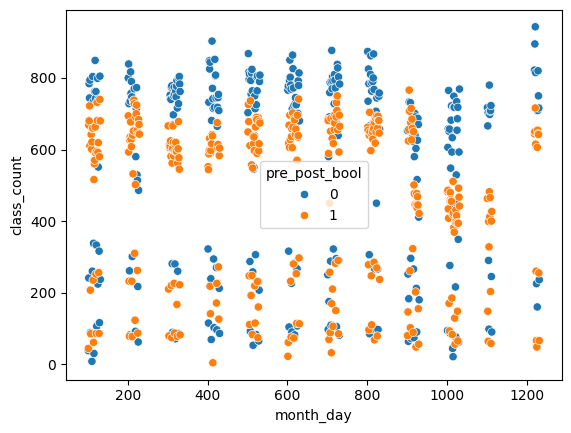

In [110]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 6]

sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")
plt.show()

# 0 pre-enf. 1 post-enf.

In [111]:
#Mean Variance of Daily Vehicle Count Veh. Class 6 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    319.000000
mean     557.150470
std      272.836145
min        8.000000
25%      280.500000
50%      697.000000
75%      768.500000
max      943.000000
Name: class_count, dtype: float64

In [112]:
#Mean Variance of Daily Vehicle Count Veh. Class 6 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    322.000000
mean     461.633540
std      228.439667
min        4.000000
25%      239.500000
50%      582.500000
75%      650.000000
max      766.000000
Name: class_count, dtype: float64

Vehicle Class 7

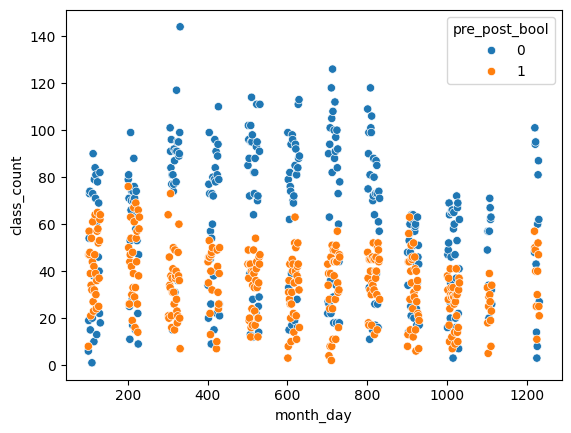

In [113]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 7]

sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")
plt.show()

# 0 pre-enf. 1 post-enf.

In [114]:
#Mean Variance of Daily Vehicle Count Veh. Class 7 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    319.000000
mean      59.959248
std       30.476946
min        1.000000
25%       31.500000
50%       64.000000
75%       84.000000
max      144.000000
Name: class_count, dtype: float64

In [115]:
#Mean Variance of Daily Vehicle Count Veh. Class 7 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    321.000000
mean      34.616822
std       14.954083
min        2.000000
25%       24.000000
50%       35.000000
75%       45.000000
max       76.000000
Name: class_count, dtype: float64

Vehicle Class 8

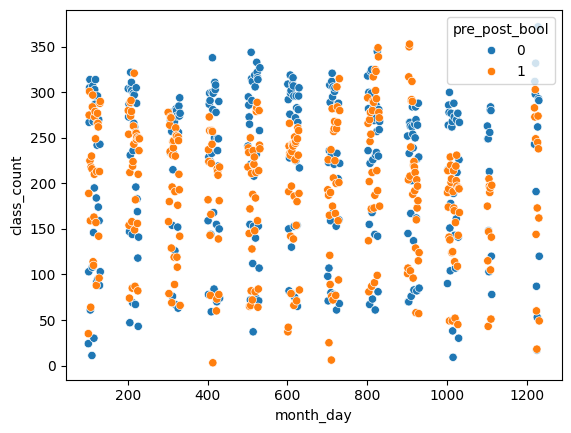

In [116]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 8]

sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")
plt.show()

# 0 pre-enf. 1 post-enf.

In [117]:
#Mean Variance of Daily Vehicle Count Veh. Class 8 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    319.000000
mean     216.435737
std       87.383389
min        9.000000
25%      150.000000
50%      249.000000
75%      286.000000
max      372.000000
Name: class_count, dtype: float64

In [118]:
#Mean Variance of Daily Vehicle Count Veh. Class 8 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    322.000000
mean     193.590062
std       76.168159
min        3.000000
25%      142.000000
50%      205.500000
75%      250.750000
max      353.000000
Name: class_count, dtype: float64

Vehicle Class 9

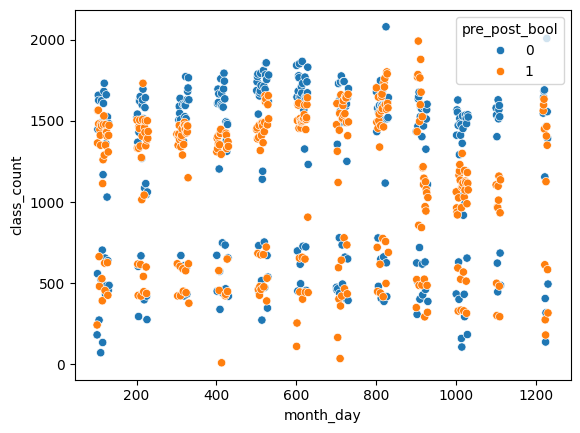

In [119]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 9]

sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")
plt.show()

# 0 pre-enf. 1 post-enf.

In [120]:
#Mean Variance of Daily Vehicle Count Veh. Class 9 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count     319.000000
mean     1230.253918
std       524.346669
min        72.000000
25%       658.500000
50%      1506.000000
75%      1633.500000
max      2080.000000
Name: class_count, dtype: float64

In [121]:
#Mean Variance of Daily Vehicle Count Veh. Class 9 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count     322.000000
mean     1117.739130
std       468.119923
min        10.000000
25%       621.000000
50%      1332.500000
75%      1485.750000
max      1992.000000
Name: class_count, dtype: float64

Vehicle Class 10

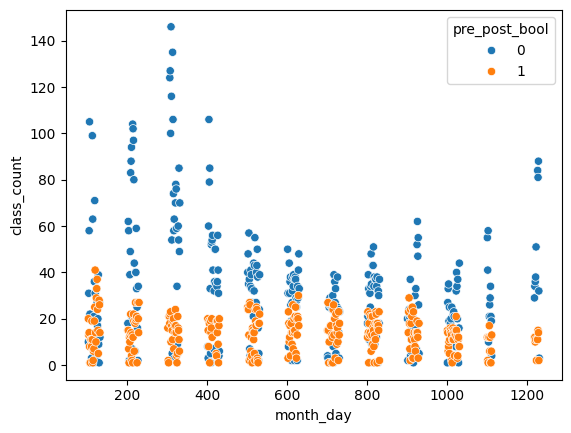

In [122]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 10]

sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")
plt.show()

# 0 pre-enf. 1 post-enf.

In [123]:
#Mean Variance of Daily Vehicle Count Veh. Class 10 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    304.000000
mean      32.812500
std       26.371196
min        1.000000
25%       13.750000
50%       29.500000
75%       41.000000
max      146.000000
Name: class_count, dtype: float64

In [124]:
#Mean Variance of Daily Vehicle Count Veh. Class 10 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    296.000000
mean      13.560811
std        7.686419
min        1.000000
25%        8.000000
50%       14.000000
75%       19.000000
max       41.000000
Name: class_count, dtype: float64

Vehicle Class 11

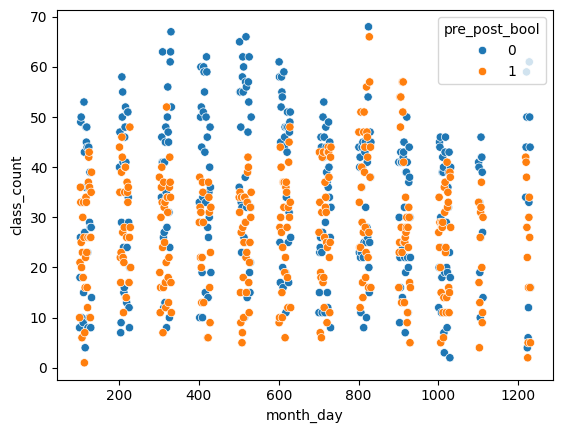

In [125]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 11]

sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")
plt.show()

# 0 pre-enf. 1 post-enf.

In [126]:
#Mean Variance of Daily Vehicle Count Veh. Class 11 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    318.000000
mean      34.220126
std       15.754484
min        2.000000
25%       22.000000
50%       36.000000
75%       46.000000
max       68.000000
Name: class_count, dtype: float64

In [127]:
#Mean Variance of Daily Vehicle Count Veh. Class 11 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    320.000000
mean      27.193750
std       12.171449
min        1.000000
25%       17.000000
50%       28.000000
75%       36.000000
max       66.000000
Name: class_count, dtype: float64

Vehicle Class 12

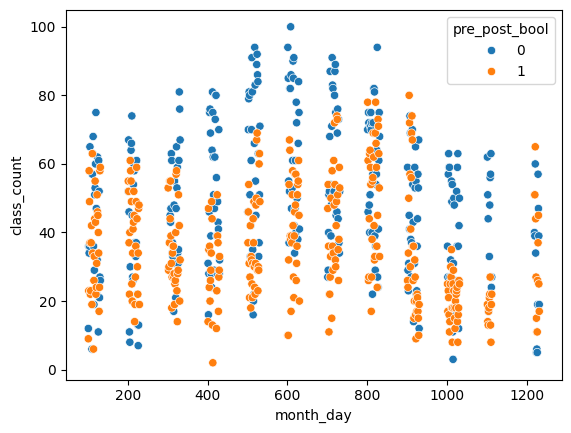

In [128]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 12]

sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")
plt.show()

# 0 pre-enf. 1 post-enf.

In [129]:
#Mean Variance of Daily Vehicle Count Veh. Class 12 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    318.000000
mean      48.984277
std       21.672710
min        3.000000
25%       33.000000
50%       48.000000
75%       64.750000
max      100.000000
Name: class_count, dtype: float64

In [130]:
#Mean Variance of Daily Vehicle Count Veh. Class 12 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    320.000000
mean      35.903125
std       16.922467
min        2.000000
25%       22.000000
50%       33.000000
75%       49.000000
max       80.000000
Name: class_count, dtype: float64

Vehicle Class 13

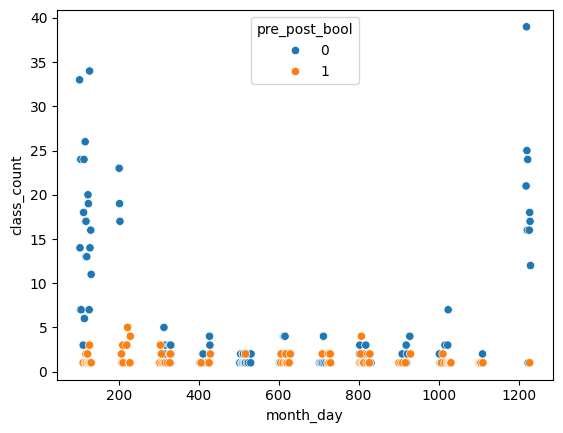

In [131]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 13]

sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")
plt.show()

# 0 pre-enf. 1 post-enf.

In [132]:
#Mean Variance of Daily Vehicle Count Veh. Class 13 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    149.000000
mean       5.214765
std        7.761272
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       39.000000
Name: class_count, dtype: float64

In [133]:
#Mean Variance of Daily Vehicle Count Veh. Class 13 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    83.000000
mean      1.445783
std       0.800198
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       5.000000
Name: class_count, dtype: float64

Vehicle Class 14

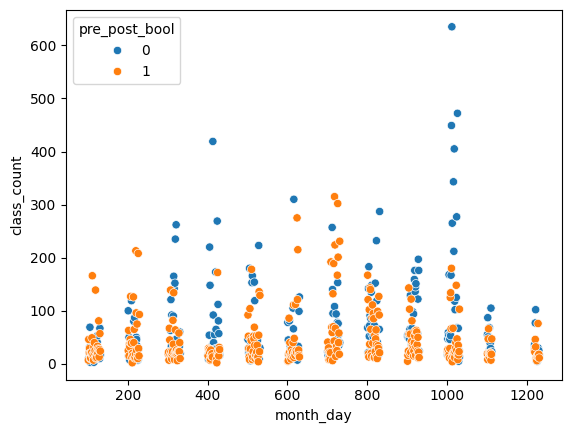

In [134]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 14]

sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")
plt.show()

# 0 pre-enf. 1 post-enf.

In [135]:
#Mean Variance of Daily Vehicle Count Veh. Class 14 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    318.000000
mean      63.905660
std       80.162634
min        3.000000
25%       19.250000
50%       35.000000
75%       71.250000
max      635.000000
Name: class_count, dtype: float64

In [136]:
#Mean Variance of Daily Vehicle Count Veh. Class 14 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    320.000000
mean      46.193750
std       51.947948
min        2.000000
25%       16.000000
50%       24.500000
75%       53.250000
max      315.000000
Name: class_count, dtype: float64